### Houses Price - Entendendo os Dados

Objetivos:
- [X] Fazer a limpeza de dados duplicados
- [ ] Fazer o tratamento de dados faltantes
- [ ] Criar um df para organizar os dados de forma agrupada

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importando os dados
df_train = pd.read_csv('train.csv')

##### Observações

Este dataset possui muitas colunas que são categóricas

##### Características do lote e acesso

In [3]:
# Tipo de rua
df_train['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [5]:
# Tipo de acesso por:
df_train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [6]:
df_train['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

##### Localização e vizinhança

In [7]:
df_train['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [8]:
# Verificar qual é a Condition2 mais comum dentro de cada Condition1. 
df_train.groupby('Condition1')['Condition2'].value_counts()

Condition1  Condition2
Artery      Norm            45
            Artery           2
            PosA             1
Feedr       Norm            76
            RRNn             2
            Feedr            1
            RRAe             1
            RRAn             1
Norm        Norm          1260
PosA        Norm             8
PosN        Norm            17
            PosN             2
RRAe        Norm            11
RRAn        Norm            22
            Feedr            4
RRNe        Norm             2
RRNn        Norm             4
            Feedr            1
Name: count, dtype: int64

#### Tipo e estilo da construção

In [9]:
df_train['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [10]:
df_train['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [11]:
# Qualidade e condição geral da casa
# Fazer um gráfico de sino!!!!
df_train['OverallQual'].value_counts().sort_index(ascending=False)

OverallQual
10     18
9      43
8     168
7     319
6     374
5     397
4     116
3      20
2       3
1       2
Name: count, dtype: int64

In [12]:
# Verificar qual é a Condition2 mais comum dentro de cada Condition1. 
df_train.groupby('YearBuilt')['YearRemodAdd'].value_counts()

YearBuilt  YearRemodAdd
1872       1987             1
1875       1996             1
1880       1950             1
           1991             1
           2002             1
                           ..
2008       2008            16
           2009             7
2009       2009            14
           2010             4
2010       2010             1
Name: count, Length: 421, dtype: int64

In [13]:
# Verificar se a casa já foi reformada ou não.
df_train['isRenovated'] = df_train['YearBuilt'] != df_train['YearRemodAdd']

In [14]:
# Quanto tempo depois da construção a reforma ocorreu.
df_train.groupby('YearBuilt')['YearRemodAdd'].value_counts()

YearBuilt  YearRemodAdd
1872       1987             1
1875       1996             1
1880       1950             1
           1991             1
           2002             1
                           ..
2008       2008            16
           2009             7
2009       2009            14
           2010             4
2010       2010             1
Name: count, Length: 421, dtype: int64

In [26]:
df_train['YearBuilt'].corr(df_train['SalePrice'])

np.float64(0.522897332879497)

In [ ]:
# Como a reforma pode influenciar o preço da casa (casas reformadas tendem a valer mais).
# Determinou uma correlação negativa, porém ao fazer a correlação de cada coluna o resultado 0.5 ~ 0.58
df_train['yearsUntilRenovation'] = df_train['YearRemodAdd'] - df_train['YearBuilt']
df_train['yearsUntilRenovation'].corr(df_train['SalePrice'])

np.float64(-0.21750331522000238)

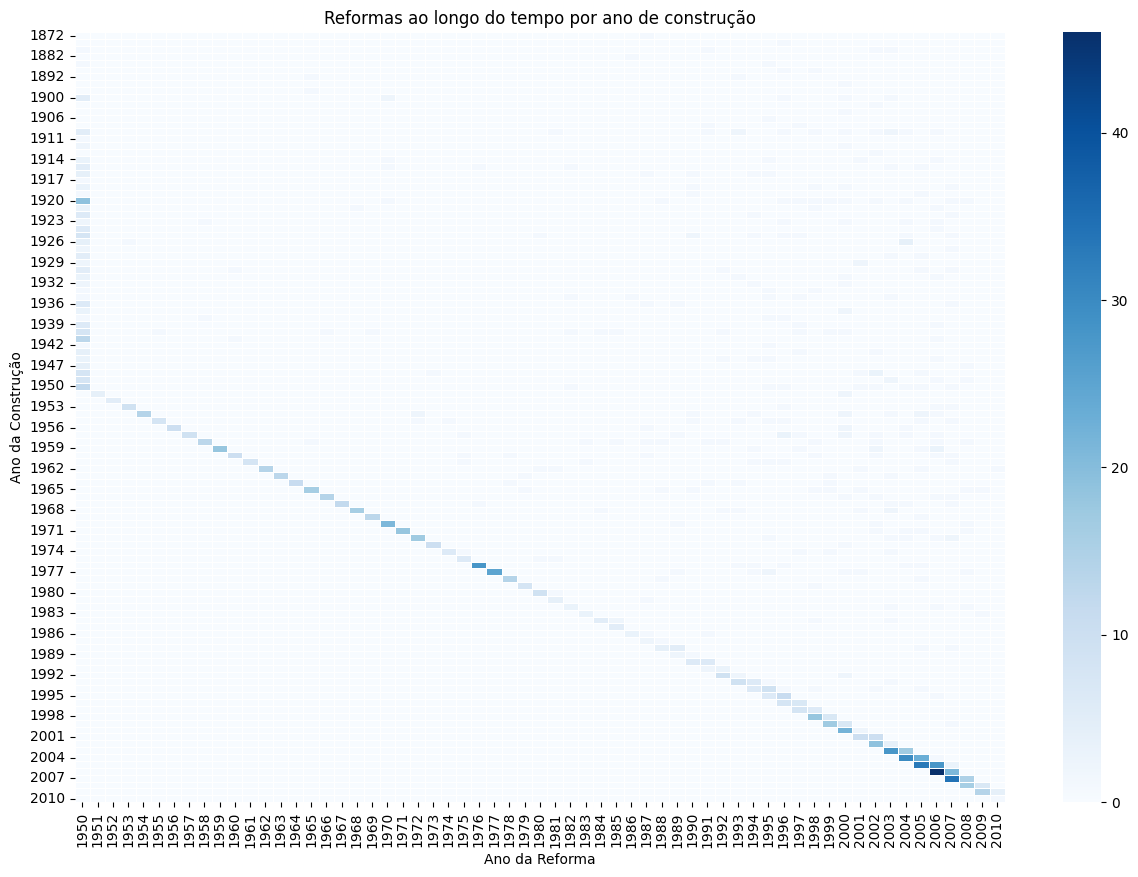

In [19]:
plt.figure(figsize=(15, 10))
df_heatmap = df_train.groupby(['YearBuilt', 'YearRemodAdd']).size().unstack(fill_value=0)
sns.heatmap(df_heatmap, cmap="Blues", linewidths=0.5)
plt.title("Reformas ao longo do tempo por ano de construção")
plt.xlabel("Ano da Reforma")
plt.ylabel("Ano da Construção")
plt.show()

##### Cobertura e exterior

In [27]:
df_train['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [28]:
df_train['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [ ]:
df_train[''].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

#### Tentando compreender a correlacoes com a variavel alvo => SalePrice

In [ ]:
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'df' é o seu DataFrame e já foi carregado
# plt.figure(figsize=(10, 6)) # Opcional: ajustar o tamanho do gráfico
sns.boxplot(x='SaleType', y='SalePrice', data=df_train)
plt.title('Distribuição de Preços de Venda por Tipo de Venda')
plt.xlabel('Tipo de Venda')
plt.ylabel('Preço de Venda')
plt.xticks(rotation=45) # Gira os rótulos do eixo X para facilitar a leitura
plt.show()

teste excel

In [21]:
df_train['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64